#### <a/ id='top'></a>
# Homework 2: Introduction to Probability and Simulation 
***

**Name**: 

***

This assignment is due on Moodle by **5 PM on Friday September 28**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code.
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected.
- Leave all of your code cells executed and the output displayed before submitting your final notebook. That way, we do not need to re-run all of the simulations, which can be time-consuming.
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5) | [Challenge!](#ch)

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

***
<a/ id='p1'></a>
[Back to top](#top)

### [20 points] Problem 1

To play a game, you have a bag containing 28 fair [four-sided dice](https://en.wikipedia.org/wiki/Four-sided_die), with faces `{1,2,3,4}`.  This bag also contains 10 fair six-sided dice (faces `{1,2,3,4,5,6}`) and 2 fair twenty-sided dice (faces `{1,2,3,4,...,19,20}`).  Call these 3 classes of die "Four", "Six" and "Twenty" (or F, S, and T, for short).  You grab one die at random from the box.  

Work the following problems by hand unless otherwise stated (but don't be afraid to simulate to check your result!). 

**Part A**: You roll your die one time.  What is the probability of the event $R_5$, that you roll a 5?  Include at least 4 decimal places in your answer.

The probability of rolling a five can be calculated as
$$P(R_5) = P(S)\cdot P(R_5 \mid S) + P(T) \cdot P(R_5 \mid T)$$
Where the probablity of grabbing a d6 is $P(S) = \frac{1}{4}$, and the probability of grabbing a d20 is $P(T) = \frac{1}{20}$ from the ratio of the numbers of these dice (10,2) over the total number of dice (40.)    
The probability of rolling a 5 on a d6 is $P(R_5 \mid S) = \frac{1}{6}$, and on a d20, $P(R_5 \mid T) = \frac{1}{20}$ because these dice are fair.    
The total probability can therefore be computed as
$$ P(R_5) = \frac{1}{4\cdot 6} + \frac{1}{20^2} = \frac{1}{24} + \frac{1}{400} \approx 0.4416667$$

**Part B**: Suppose you roll a 5.  What is the probability that the die you chose from the box is a Six-sided die? 

The probability that a d6 was rolled given than the result is 5 can be computed as
$$P(S\mid R_5) = \frac{P(R_5 \mid S) P(S)}{P(R_5)}$$
This follows from Bayes' rule. The values can be taken from the Part A as $P(R_5 \mid S) = \frac{1}{6}$, $P(S) = \frac{1}{4}$, and $P(R_5) \approx 0.4416667$. This yields the computation
$$P(S\mid R_5) = \frac{\frac{1}{6\cdot 4}}{0.4416667} = 0.943396$$

In [2]:
#Verification
pr5 = 1/24 + 1/400
print("P(R_5) = ", pr5)
ps_r5 = 1/24/pr5
print("P(S|R_5) = ",ps_r5)

P(R_5) =  0.04416666666666667
P(S|R_5) =  0.9433962264150942


**Part C:**  Are the events $R_5$ and $S$ independent?  Justify your answer **using math**.

The events $R_5$ and $S$ are not independent because of the following inequalities
\begin{align}
P(R_5 \mid S) = \frac{1}{6} &\ne P(R_5) = 0.4417 \\
P(S \mid R_5) = 0.9434 &\ne P(S) = \frac{1}{4}
\end{align}
The events are independent if and only if the above vaules are equal

**Part D:**  Suppose you roll your die $n$ times and record each outcome.  Obviously, if you roll 5 or 6 you know you did *not* pick a Four-sided die, and if you roll a 7 or higher, you must have picked a Twenty-sided die.

But, if you roll $n$ times in a row and get only 1, 2, 3 or 4, you would have a stronger belief that you in fact grabbed one of the Four-sided dice.  Let $E_n$ be the event that you roll $n$ rolls of 1, 2, 3 or 4 in a row.  For example, one outcome in $E_3$ is the sequence 2, 3, 1.

Given that you roll a single value of 1, 2, 3 or 4, what is the probability that you have grabbed a Four-sided die?  That is, calculate **by hand** $P(F \mid E_1)$.

The Probability of rolling a single value less than five can be computed by the following steps
$$P(E_1) = P(F) \cdot P(E_1 \mid F) + P(S) \cdot P(E_1 \mid F) + P(T) \cdot P(E_1 \mid T)$$
where the probability of E_1 is found from four sides over the total number of sides of that die
\begin{align}
P(E_1 \mid F) &= 1\\
P(E_1 \mid S) &= \frac{4}{6} = \frac{2}{3}\\
P(E_1 \mid T) &= \frac{4}{20} = \frac{1}{5}\\
\end{align}
therefore
$$P(E_1) = \frac{7}{10} + \frac{2}{4\cdot 3} + \frac{1}{10\cdot5} = \frac{133}{150} \approx 0.886667$$
and by Bayes' Rule
$$P(F \mid E_1) = \frac{P(E_1 \mid F) \cdot P(F)}{P(E_1)} = \frac{1\cdot0.7}{0.886667} \approx 0.789474$$

**Part E**:  

First, work out **by hand** a formula for the probability in general that you are rolling a Four-sided die, given that you have rolled $n$ values in a row that are 1, 2, 3 or 4 (that is, $E_n$).  So you want a formula for $P(F \mid E_n)$ in terms of $n$.

Then, define a function `prob_four` to calculate $P(F \mid E_n)$.  This function should only take one positive integer argument, $n$.

Verify that your function is performing as expected by checking your answer to **Part D**.

An expression for $P(E_n)$ can be found by taking the expression in **Part D** and raising each probability of $E_1$ (dependent on a specific die) to the n power, or $P(E_n \mid D) = P(E_1 \mid D)^n$ where D is any die F, S, or T, and the supsequent rolls of the selected die are assumed to be independent. The expression is as follows
$$P(E_n) = \frac{7}{10} + \frac{1}{4} \Big(\frac{2}{3}\Big)^n + \frac{1}{10}\Big(\frac{1}{5}\Big)^n$$
Bayes' rule can then be applied again to find $P(F\mid E_n)$. Note that $P(E_n\mid F) = 1$
$$P(F \mid E_n) = \frac{P(F)}{P(E_n)}$$

In [3]:
def prob_four(n):
    #implement expression in the return as to not waste space
    return 0.7/( 0.7 + pow(2,n)/(4*pow(3,n)) + 1/(10*pow(5,n)) )
    

**Part F:**  What is the smallest value of $n$ successive rolls of 1, 2, 3 or 4 that would make you believe that there's a better-than-95% chance that the die you grabbed is Four-sided?  Plugging larger and larger values for $n$ into your `prob_four` function is a very reasonable way to check this.

In [4]:
p = 0
n = 1
while(p<0.95):
    n += 1
    p = prob_four(n)
    
print("Rolling the die ", n, " times without exceeding a roll of 4 will mean that the die has a ", 100*p, "% chance of being a d4." )

Rolling the die  5  times without exceeding a roll of 4 will mean that the die has a  95.50397170755757 % chance of being a d4.


***
<a/ id='p2'></a>
[Back to top](#top)

### [20 points] Problem 2

Oscar and Stella are two average young adult octopuses. They work hard, but they also like to blow off a little steam after work. When they leave work from the CU Engineering Center ($E~$), they each head for one of five other locations: the Gym to get strong ($G~$), the Library to get learned ($L~$), the Boulder Reservoir to have a nice swim ($R$), the Hill to have a sandwich ($H~$), or to Brewing Market to have a nice Coffee ($C~$).  

Here are some rules governing their movements throughout the fair city of Boulder:
* When Oscar and/or Stella is leaving one location, they randomly select one of the available adjacent locations, with equal probability.
* This includes back-tracking, but note that to return to their original location would require 2 moves.
* Assume that all moves require the same amount of time.
* They are also not allowed to stay put; they always must move to some *other* adjacent location.
* Oscar and Stella, being the think-for-yourselfers that they are, also act **independently** of one another. That is, the probability that Oscar goes from one place to another is independent of the probability of Stella's movements.
* As we learned from your answers to Problem 5 of Homework 1, Stella and Oscar of course prefer to *walk* from place to place, as opposed to swim... because one of an octopus' *three* hearts will stop beating when it swims. Yowza!

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/chris_and_dan_statespace.png" style="width: 300px;"/>

**Part A**: Oscar, being a learned octopus, wants to go to the library, but also wants to make a stop somewhere else first, for he has octopus errands to run. Compute (by hand) the probability that Oscar ends up at the the Library ($L$) after first visiting one other location, after he is initially at the Engineering Center ($E$). 

Oscar can either go to the Gym or Brewing market before going to the library from the engineering center. The probability of these two events can be computed separately then summed together because they are disjoint. The probability of oscar going to any adjacent location from the engineering center or the gym is is $P(E) = P(G) \frac{1}{4}$, and the probability of any one location being visited after the coffee shop is $P(C) = \frac{1}{3}$. therefore the probability of either of these paths are $P(EGL) = \frac{1}{16}$ and $P(ECL) = \frac{1}{12}$. The probability of either path being taken is then $P(E2L) = \frac{1}{16} + \frac{1}{12} = \frac{7}{48} \approx 0.1458$.

**Part B**: Stella, on the other tentacle, is a body-building octopus. This is quite the feat given her lack of bones! Compute (by hand) the probability that Stella ends up at the Gym _either_ as her first _or_ second location visited after leaving the Reservsoir. (Again, assume that Stella wanders the streets of Boulder randomly using the same rules described above.)

The probability that Stella goes to the gym as either her first or second location after the reservoir is again a conjunction of two disjoint events, the probability of going straight to the gym, $P(R) = \frac{1}{2}$, and $P(REG) = \frac{1}{2} \cdot \frac{1}{4} = \frac{1}{8}$. The probability of either path is again the sum of the probabilities, $P(R2G) = \frac{1}{2}+\frac{1}{8} = \frac{5}{8} = 0.625$

**Part C**: Suppose that Oscar works late at the Engineering Center, while Stella goes to the Hill.  Later, they both leave and wander around, randomly and independently of one another, as described above.
1. What is the probability that they run into each other in the same location on the first location visited?  
2. Given their two initial locations, what is the probability that they meet at the Hill after 2 moves?

1. If Oscar annd Stella were to meet after only one movement each, they are either meeting at the gym, the library, or the coffee shop. The probability of Stella going to any of these locations is $P(H) = \frac{1}{3}$, while the probability of Oscar going to any one of these is $P(E) = \frac{1}{4}$. The event of them meeting at one of these locations is the intersection of these equivalent events, $P(meet_L) = \frac{1}{12}$. There are however three disjoint ways of this happening, so the total probability of any one of these events happeneing is $P(meet_1) = \frac{3}{12} = \frac{1}{4}$.
2. The probability that the two octopi meet at the Hill after 2 moves is a intersection of the union of paths where Stella backtracks and the union of paths where Oscar makes it all the way to the hill in two movements. The probability of the former is $P(H_{Stella}) = P(H) (P(G)+P(L)+P(C)) = \frac{1}{3}\Big(\frac{1}{4}+\frac{1}{4}+\frac{1}{3}\Big) = \frac{5}{18}$. The probability of the latter is $P(H_{Oscar}) = P(E) (P(G)+P(L)+P(C)) = \frac{1}{4}\Big(\frac{1}{4}+\frac{1}{4}+\frac{1}{3}\Big) = \frac{5}{24}$. The total probability that Stella and Oscar will both be at the Hill after 2 movements is $P(meet_2)=P(H_{Stella})P(H_{Oscar}) = \frac{25}{432} \approx 0.0578704$ 


**Part D**: Write a simulation to confirm that your by-hand calculations in **Part A**, **Part B**, and **Part C** are correct. Make sure you run your simulations for enough trials that your estimates are reasonably close to your analytic results. In addition to showing your code, you should explain in Markdown (not just in code comments) what your code is doing and why it is a reasonable approximation of the probabilities in **Part A**, **Part B**, and **Part C**.  

In [17]:
# Each location is defined with an array of it's adjacent locations
H = np.array(['G','L','C'])
G = np.array(['H','L','R','E'])
L = np.array(['H','G','C','E'])
C = np.array(['H','L','E'])
E = np.array(['G','L','C','R'])
R = np.array(['G','E'])
# Define number of trials
num_trials = 100000
print("Using ", num_trials, " Simulations...")

Hs = np.random.choice(H, size=num_trials)
Gs = np.random.choice(G, size=num_trials)
Ls = np.random.choice(L, size=num_trials)
Cs = np.random.choice(C, size=num_trials)
Es = np.random.choice(E, size=num_trials)
Rs = np.random.choice(R, size=num_trials)

# Part A
# E to L in 2 movements
# either through G or C
num_through_G = np.logical_and((Es=='G'),(Gs=='L')).sum()
num_through_C = np.logical_and((Es=='C'),(Cs=='L')).sum()
total_A = num_through_G + num_through_C
prob_A  = total_A/num_trials
print("A\tThe probability that Oscar ends up at the Library in 2 movements is\t\t{:.4f}".format(prob_A))

# Part B
# R to G in 1 or 2 movements
# either direct or through E
num_direct = (Rs=='G').sum()
num_through_E = np.logical_and(Rs=='E',Es=='G').sum()
total_B = num_direct + num_through_E
prob_B  = total_B/num_trials
print("B\tThe probability that Stella ends up at the Gym in 2 or fewer movements is\t{:.4f}".format(prob_B))

# Part C
# from E and H, meeeting after 1 movement
num_meet = (Es==Hs).sum()
prob_C1  = num_meet/num_trials
print("C\tThe probability that Stella and Oscar meet after 1 movement is \t\t\t{:.4f}".format(prob_C1))

# both meet at H after 2 movements
# Stella can either move through G, L, or C
arr_Stella = np.logical_or( np.logical_or(
    np.logical_and(Hs=='G',Gs=='H'),
    np.logical_and(Hs=='L',Ls=='H')),
    np.logical_and(Hs=='C',Cs=='H'))
# Oscar can either move through G, L, or C also
# Here we must re-roll the G, L, and C destination choices to ensure that they're independent of Stella's movements
Gs = np.random.choice(G, size=num_trials)
Ls = np.random.choice(L, size=num_trials)
Cs = np.random.choice(C, size=num_trials)

arr_Oscar = np.logical_or( np.logical_or(
    np.logical_and(Es=='G',Gs=='H'),
    np.logical_and(Es=='L',Ls=='H')),
    np.logical_and(Es=='C',Cs=='H'))
num_meet2 = np.logical_and(arr_Stella,arr_Oscar).sum()
prob_C2 = num_meet2/num_trials
print(" \tThe probability that Stella and Oscar meet at the Hill after 2 movements is\t{:.4f}".format(prob_C2))
# print(arr_Stella.sum()/num_trials, arr_Oscar.sum()/num_trials) #debug statement

Using  100000  Simulations...
A	The probability that Oscar ends up at the Library in 2 movements is		0.1449
B	The probability that Stella ends up at the Gym in 2 or fewer movements is	0.6254
C	The probability that Stella and Oscar meet after 1 movement is 			0.2482
 	The probability that Stella and Oscar meet at the Hill after 2 movements is	0.0571


The code simulates 100,000 trials by determining randomly which location an octopus will go to given its starting location. The choices for where it can go are defined by the given graph and are defined in the code as lists of destinations at each location. Paths longer than one movement are assembled by linking single movements together such that the destination of the first movement is used as the starting location for the second movement. In order to commpute this, logical numpy arrays are generated and compared. The sum of these logical arrays then tells us how many trials are successful for each part. 

This method is a reasonable estimate of the probabilities computed by hand because each movement is chosen at random such that every location has an equal probability of being chosen. This is the same as what was assumed in the earlier parts of the problem, so the estimate should be similar to the theorhetical probabilities. Note that in the last computation, the choices for the second movement must be redetermined to ensure they that the two octopi's movements are independent. They estimate should also improve with the number of trials used.

***
<a/ id='p3'></a>
[Back to top](#top)

### [20 points] Problem 3  

As part of their Computer Science Jedi training, Tony and Dan are having a lightsaber duel. The rules of the lightsaber duel are as follows:
* The duel is composed of a number of rounds.
* Each round consists of Tony practicing his sweetest Jedi moves and trying to strike Dan, then Dan practicing *his* best moves and trying to strike Tony.
* If Tony manages to strike Dan, then Tony is awarded a point, and similarly if Dan manages to strike Tony, then Dan is awarded a point.
* If a round ends in a tie, then Tony and Dan proceed to another round. If a round ends with one Jedi scoring a point but the other one does not, then the Jedi who scored a point wins the duel.

Let $T$ be the event that "Tony wins the duel", $E$ be the event that "the duel ends after the first round of lightsaber strikes", and $C$ be the event that "the duel continues after the first round of lightsaber strikes".  Suppose that the result of one lightsaber strike is independent of the other strikes, Tony successfully lands his lightsaber strikes with probability $p$, and Dan lands his strikes with probability $q$.

**Part A**: The duel will continue until Tony or Dan wins.  What is the sample space $\Omega$ for this "experiment"?  Represent the outcomes of individual lightsaber strikes by $H$ for a hit and $M$ for a miss, and assume that Tony has the first strike in each round. At the very least, your answer should include all of the events in $\Omega$ that include one or two rounds.

The sample space describes all possible outcomes. In this case there are many ways of representing the sample space. Assuming that one jedi will eventually win the duel, it can be said that $\Omega = T \cup T^C$, that the sample space is the union of Tony winning and Dan winning. If we want to represent the outcome of each round, the sample space can be represented as $\Omega = E\cup C = E_1 \cup E_2 \cup E_3 \cup \cdots \cup E_n$. Here $E_n$ represents the event that the duel ends in the $n^{th}$ round. This can be broken down further into the outcomes of strikes in each round, 
$$\Omega = H_T \cap M_D \cup M_T \cap H_D \cup C \cap H_t \cap M_D \cup C \cap M_T \cap H_D \cup \cdots$$ Here only two rounds are shown but again it is possible for the match to last any integer $n$ rounds.

**Part B**: Determine $P(T \mid E)$ in terms of $p$ and $q$.

Given that $p$ is the probability of $H_T$, and $q$ is the probability of $H_D$, the probability of E can first be found via the Law of Total Probability.
$$P(E) = P(E \mid H_T) P(H_T) + P(E \mid H_T^C) P(H_T^C) = (1-q)p + q(1-p) = p+q-2pq$$
The probability that Tony wins the duel if it only lasts one round can be found by considering that the probability of the intersection of $E$ and $T$ is the unique scenario where Tony lands a hit and Dan does not, $P(T\cap E) = P(H_T) P(H_D^C) = p(1-q)$. The conditional probability can then be computed as
$$P(T \mid E) = \frac{P(T\cap E)}{P(E)} = \frac{p(1-q)}{p+q-2pq}=\frac{p-pq}{p+q-2pq}$$

**Part C**: Explain why events $C$ and $T$ are independent. 

Event $C$ describes the event that the duel lasts longer than one round, while event $T$ describes the event that Tony wins the Duel. $T$ is possible whether or not the duel lasts one round and each round has the exact same probability of $T$ happening. Knowing that these events are indepenedent allows us to write the following equalities.
\begin{align}
P(T\mid C) &= P(T)\\
P(C\mid T) &= P(C)\\
P(C\cap T) &= P(C) P(T)
\end{align}

**Part D**: Use the Law of Total Probability to show that $P(T) = p(1-q) + (2pq - p - q +1) P(T \mid C)$. 

The Law of Total Probability can be used to find the probability that Tony wins. This expression is first split based on the conditions of $E$ or $C$. Expressions for $P(T\cap E)$ and $P(E)$ can then be substituted in from the earlier parts of the question. 
$$P(T) = P(T\mid E) P(E) + P(T\mid C) P(C) = P(T\cap E)+ P(E^C) = p(1-q) + (1-p-q+2pq) P(T\mid C)$$

**Part E**: Use the fact from **Part C** that $P(T \mid C) = P(T)$ to determine $P(T)$ in terms of $p$ and $q$. 

Using what was determined in **Parts C & D**, P(T) can be determined.
$$P(T) = p(1-q)+(1-p-q+2pq) P(T) \rightarrow P(T) (p+q-2pq) = p(1-q) \rightarrow P(T) = \frac{p(1-q)}{p+q-2pq}$$
This is great because it agrees with the answer to **Part B**

**Part F**: Explain why the answers to **Part B** and **Part E** are the same. 

The answers to **Parts B & E** are the same because just as $T$ is independent of $C$, as discussed in **Part C**, $T$ will also be independent with the complement, $C^C=E$. This independence validates the equality $P(T\mid E) = P(T)$, which equates the answers to **Parts B & E**.

**Part G**: Explain the significance of the solution technique for $P(T)$ outlined in **Part D** and **Part E**.  Why did we go this route instead of computing $P(T)$ directly?  Can we always use such techniques?  What assumption did we need to make in order to use this solution approach?

The solution technique used in **Parts D & E** is significant because it allowed us to take advantage of independent events and the Law of Total Probability to solve for the probability of $T$ in a novel way. Specifically, this approach allowed for the computation of a probability of an event that could occur in an unspecified number of ways (because an unspecified number of rounds can occur). In order to use this approach we had to take advantage of the assumed symmetry of the rounds. If $p$ and $q$ were not constant over time, or if the lightsaber strikes were not independent of each other, this approach would not work. Specifically, the simplification made in **Part C** would be invalid. 

***
<a/ id='p4'></a>
[Back to top](#top)

### [20 points] Problem 4

In this problem you will write some code to simulate the game of **Miniopoly** (a very rough approximation of [Monopoly](https://en.wikipedia.org/wiki/Monopoly_(game)).  The game consists of a round board with 40 "squares" numbered from $0$ to $39$, where squares $0$ and would-be $40$ are [coincident](https://en.wikipedia.org/wiki/Coincident) and called **GO**.  A player starts on **GO** with \$200 in their pocket.  On each turn the player rolls a pair of dice and then moves a number of spaces equal to the sum of the dice.  Landing on different squares have different results: 

- Squares 2, 7, 17, 22, 33, and 36 cause you to draw a card.  The cards tell you to collect \$50, \$100 or \$200, or pay the bank \$50 or \$100.  There is always an equal probability associated with each of these possible cards.

<p> </p>

- Squares 0, 10, and 20 do not trigger any action 

<p> </p>

- Square 30 is **Go To Jail**, which sends the player directly to **Jail** and ends the turn 

<p> </p>

- If a player starts a turn from **Jail** she rolls two dice: 

    - If the player rolls doubles (i.e. the dice have equal values) the player moves from Square 10 a number of squares equal to the sum of the dice
    
    - If the player rolls anything other than doubles she pays the bank \$20 and remains in **Jail** 
    
<p> </p>

- If the player passes or lands on **GO** she collects \$200. 

<p> </p>

- If the player lands on any other square not mentioned above, she pays the bank an amount equal to the square's number (e.g. if she lands on Square 29 she pays the bank \$29). 

<p> </p>

If at any point the player has \$0 or less they go bankrupt and the game ends.

See [here](http://www.cs.colorado.edu/~tonyewong/home/resources/miniopoly_example.png) for an example of the Miniopoly board layout.

<br>

**Part A**: Complete the function miniopoly_turn below. The function should simulate one turn of Miniopoly.  It should take as arguments the player's current location on the board as well as the player's current cash reserves, and return the player's new location and cash reserves after the turn has completed. Note that if a player goes bankrupt during the game you should return their cash as 0 instead of a negative value.  

In [6]:
# Possible d6 values array
d6 = np.array(range(1,7))

# Possible card cash outcomes
card = np.array([50,100,200,-50,-100])

def miniopoly_turn(location, cash): 
#     roll them dice
    rolls = np.random.choice(d6,size=2)
#     check if in jail
    if location == -1:
#         check for escape
        if rolls[0]==rolls[1]:
            location = 10+rolls.sum()
        else:
            
#            remain in jail case
            cash -= 20
            if cash<0:
                cash=0
            return location, cash
#     default movement is equal to sum of rolls
    location += rolls.sum()
    
#     check for passing GO second
    if location >=40:
#         don't go over 40 and add $200
        location -=40
        cash += 200
        
#     card drawing 
    if location in [2,7,17,22,33,36]:
#         execute effects of card on balance
        cash += np.random.choice(card)
#     do nothing cases
    elif location in [0,10,20]:
        pass
#     go to jail case
    elif location == 30:
#         go to jail, do not pass go, do not collect $200
        location = -1;
    else:
#         case for paying at a location
        cash -= location
    
#     check for game over
    if cash < 0:
        cash = 0;
    
    return location, cash

**Part B**: Use your function from **Part A** to Simulate at least 5000 30-turn games of Miniopoly and make a frequency histogram of the player's cash at the end of the game. 

(array([779.,  86., 183., 292., 406., 543., 581., 520., 509., 404., 276.,
        191., 110.,  68.,  31.,  14.,   4.,   2.,   0.,   1.]),
 array([   0.  ,  107.85,  215.7 ,  323.55,  431.4 ,  539.25,  647.1 ,
         754.95,  862.8 ,  970.65, 1078.5 , 1186.35, 1294.2 , 1402.05,
        1509.9 , 1617.75, 1725.6 , 1833.45, 1941.3 , 2049.15, 2157.  ]),
 <a list of 20 Patch objects>)

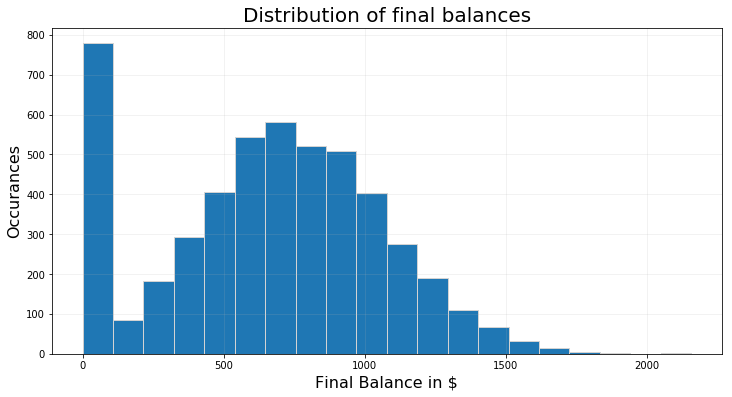

In [7]:
# parameters
num_sim = 5000
num_turn = 30

# create array for final values
final = np.zeros(num_sim)

# define function for simulations
def simini(num_turn):
#     starting values
    location = 0
    cash = 200
    jail = False
#     take the appropriate number of turns
    for j in range(num_turn):
#         call the turn function to see what happens
        location, cash = miniopoly_turn(location, cash)
        if cash==0:
#             gotta end the simulation if it's game over
            break
        if location<0:
#             detect if in jail during any turn
            jail = True
    return cash, jail

# run num_sim simulations
for i in range(num_sim):
    cash, j = simini(num_turn)
#     keep track of final balance
    final[i] = cash

# set up plot
fig, ax = plt.subplots(figsize=[12,6])
ax.set_title("Distribution of final balances",fontsize=20)
ax.set_xlabel("Final Balance in $",fontsize=16)
ax.set_ylabel("Occurances",fontsize=16)
ax.grid(True,alpha=0.2)
# plot the histogram
plt.hist(final,20,edgecolor='lightgrey')

**Part C**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in the first 30 turns of the game. 

In [8]:
# parameters
num_sim = 10000
num_turn = 30

# create array for final values and jail
final = np.zeros(num_sim)

# run num_sim simulations
for i in range(num_sim):
    cash, j = simini(num_turn)
#     keep track of final cash value
    final[i] = cash

prob_C = (final==0).sum()/num_sim
print("The probability of going backrupt in 30 turns is {:.4f}".format(prob_C))

The probability of going backrupt in 30 turns is 0.1399


**Part D**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in the first 30 turns _given_ that they went to **Jail** at least once.  Is a player more or less likely to go bankrupt if they've been to **Jail**?  

In [9]:
# parameters
num_sim = 10000
num_turn = 30

# create array for final values and jail array as a boolean type
final = np.zeros(num_sim)
jail = np.zeros(num_sim, dtype=bool)

# run num_sim simulations
for i in range(num_sim):
#     get cash and jail value
    cash, j = simini(num_turn)
#     store values
    final[i] = cash
    jail[i] = j

#     compute probability of losing among the population of jailors
prob_C = (final[jail]==0).sum()/jail.sum()
print("The probability of going backrupt in 30 turns after going to jail is {:.6f}".format(prob_C))

The probability of going backrupt in 30 turns after going to jail is 0.195352


**Part E**: Use your code from **Part A** to estimate the probability (either directly or using Bayes' Rule) that a player has gone to jail at least once, given that the player went bankrupt in the first 30 turns.

In [10]:
# use data from **Part D**

# create logical array of who went bankrupt
bankrupt = final==0
# determine probability by assessing jail rate among losers
prob_jail = jail[bankrupt].sum()/bankrupt.sum()
# print results
print("The probability that a player has gone to jail, given that she went bankrupt is {:.6f}".format(prob_jail))

The probability that a player has gone to jail, given that she went bankrupt is 0.725910


***
<a/ id='p5'></a>
[Back to top](#top)

### [20 points] Problem 5

Suppose you roll two fair six-sided dice.  Let $C$ be the event that the two rolls are _close_ to one another in value, in the sense that they're either equal or differ by only 1.  

**Part A**: Compute $P(C)$ by hand. 


On a fair d6, the odds of rolling any given value is $P(d6)=\frac{1}{6}$. If the value rolled is a 1 or a 6, then the only close value are 1 and 2 or 5 and 6, respectively. For every other possible value of the first roll, there are 3 possible values of the second roll which differ by no more than 1. The total probability of $C$ can then be computed by considering these two conditions separately.
$$P(C) = P(R_{1 \ or \ 6}) 2 P(d6) + P(R_{[2,5]}) 3 P(d6) = \frac{1}{9}+\frac{1}{3} = \frac{4}{9}$$

**Part B**: Write a simulation to run many trials (at least 10,000) of the pair of rolls and estimate the value of $P(C)$ you calculated in **Part A**.  Does your estimate agree with the exact calculation you did in **Part A**?  If not, try increasing the number of trials in your simulation. 

In [11]:
# Possible values array
d6 = np.array(range(1,7))
# define num_trials
num_trials = 100000
print("Using ", num_trials, " trials...")
# create two choices matrices
roll1 = np.random.choice(d6, size=num_trials)
roll2 = np.random.choice(d6, size=num_trials)
# compare the rolls
num_C = (abs(roll1-roll2)<2).sum()
# compute the prob
prob_C = num_C/num_trials
# Print result
print("The probability that two rolls differ by 1 or fewer is {:.6f}".format(prob_C))

Using  100000  trials...
The probability that two rolls differ by 1 or fewer is 0.444090


**Part C**: In the in-class notebook associated with Lecture 4 (nb04) we plotted a running estimate of the probability of an event as a function of the number of trials in our simulation.  Write code to run at least 10 independent simulations of at least 50,000 trials each to estimate $P(C)$ and plot their running estimate curves on the same set of axes. **Hint**: This is a lot of computation, so try to leverage Numpy as much as possible so that your code doesn't run forever. 

In [12]:
# define function
def close_sim(die,num_trials):
    # create two choices matrices
    roll1 = np.random.choice(d6, size=num_trials)
    roll2 = np.random.choice(d6, size=num_trials)
    # compare the rolls for all n up to num_trials
#     first the rolls are compared
    log_C = (abs(roll1-roll2)<2)
#     calculate the sum of successful rolls using np.cumsum()
    count_C = log_C.cumsum()
#     these values must be divided by the number of trials attempted at any given point, which is just range(n_t)+1
    div = np.array(range(1,num_trials+1))
#     the running probability estimate is given from an elementwise division of successful trials over total trials
    return count_C / div

Final Estimate for trial  0  =  0.44686
Final Estimate for trial  1  =  0.44324
Final Estimate for trial  2  =  0.44738
Final Estimate for trial  3  =  0.44174
Final Estimate for trial  4  =  0.4439


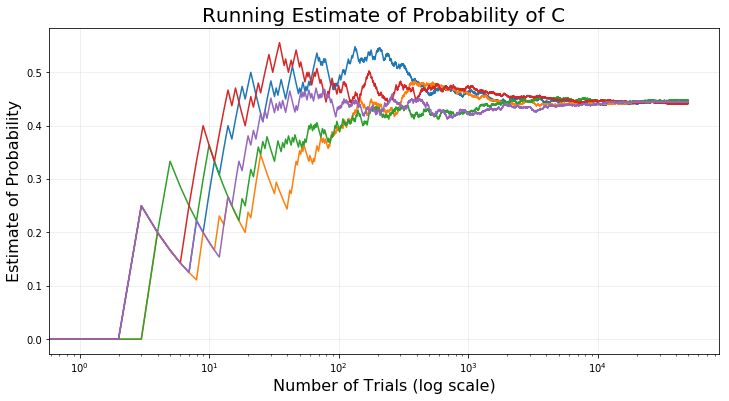

In [13]:
# use 50k trials
num_trials = 50000
# do plot stuff
fig, ax = plt.subplots(figsize=[12,6])
ax.set_title("Running Estimate of Probability of C", fontsize=20)
ax.set_xlabel("Number of Trials (log scale)", fontsize=16)
ax.set_ylabel("Estimate of Probability", fontsize=16)
ax.grid(True, alpha=0.25)
plt.xscale('log')
# simulate 5 times
for t in range(5):
    p = close_sim(d6,num_trials)
#     plot this sim
    ax.plot(p)
#     also print the final estimate
    print("Final Estimate for trial ", t, " = ", p[num_trials-1])

**Part D**: Comment on the behavior of the running estimates as the number of trials increases. 

The estimate of the probability approaches a limit of approximately $\frac{4}{9} \approx 0.444444$ just as expected. After each trial, the estimate will either go up or go down by the inverse of the number of trials. All trials fall within approximately 0.5% after the chosen 50k trials.

***
<a/ id='ch'></a>
[Back to top](#top)

### Challenge Problem - Night Falls. A Storm Rolls In. Can You Cross The River?

In every homework assignment we'll give you a Challenge Problem.  Challenge Problems never need to be turned in (and in fact, will not be graded) but we encourage you to give them a shot (after completing the required homework problems) and discuss them with your classmates and your instructors. 

This Challenge Problem was a [Riddler](https://fivethirtyeight.com/tag/the-riddler/) on [FiveThirtyEight](https://fivethirtyeight.com) a few years back. 

You’re on the north shore of a river, and want to cross to the south, via a series of 13 bridges and six islands, which you can see in the diagram below. But, as you approach the water, night falls, a bad storm rolls in, and you’re forced to wait until morning to try to cross. Overnight, the storm could render some of the bridges unusable — it has a 50 percent chance of knocking out each of the bridges. (The chance is independent for each bridge.)

<br>

![alt text](https://espnfivethirtyeight.files.wordpress.com/2016/01/roeder-riddler-diagram-11.png?w=575&h=449&quality=90&strip=info)

<br>


What’s the probability you will be able to cross the river in the morning? (You have no boat, can’t swim, can’t fix the bridges, etc. No tricks.)

In [14]:
num_sim=100000
remain = np.random.choice([0,1],size=(num_sim,13))
# print(remain)

# first three elements of each row are the bridges from the south side
# next two connect the southern islands
# next three connect the n and s islands
# next two connect the northern islands
# final three connect to N shore

# the connections are repesented here
bridges = np.array([[0,1],[0,2],[0,3],[1,2],[2,3],[1,4],[2,5],[3,6],[4,5],[5,6],[4,7],[5,7],[6,7]])

def connect(row):
#     con defines the 8 locations as s shore, s islands (3) , n islands (3) , n shore
    con = np.zeros(8)
#     south shore is connected by definition
    con[0] = 1
    for i in range(len(row)):
        b = bridges[i];
        if(row[i] and any(con[b])):
            con[b] = [1,1];
    return con[7]

cross = 0
for i in range(num_sim):
    cross += connect(remain[i,:])
    
prob_cross = cross/num_sim
print("Using ", num_sim, " simulation, the estiated probability of being able to cross is {:.6f}".format(prob_cross))

Using  100000  simulation, the estiated probability of being able to cross is 0.491810


The above code simulates this problem 100k times by deciding which bridges remain after the night, and then determing which combinations of bridges connect the two shores using the function `connect()`. I'm sure there's a better way to do this.